# EMAIL SPAM DETECTION


## INTRODUCTION :

The process of identifying and sorting unwanted or unsolicited emails, commonly known as spam, from legitimate emails. This is typically done by analyzing incoming emails for certain characteristics or red flags that signal spam or phishing content, and then automatically moving those emails to a separate folder, such as a junk or spam folder.


Spam detection systems use patterns and rules learned from analyzing large datasets of known spam and non-spam messages. They look for red flags, such as suspicious sender addresses or common spam phrases, to identify spam messages.
Using advanced algorithms and machine learning, these systems can become very accurate over time, continuously adapting to new spam techniques.

The goal of spam detection is to protect you from unwanted messages, saving you time and effort, and ensuring that you only receive relevant communication. It acts as a filter, keeping your inbox clean and protecting you from scams and irrelevant messages.

In [53]:
#importing lib
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [54]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [55]:
#size of dataframe
data.shape

(5572, 5)

In [56]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## LETS CLEAN SOME DATA

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [59]:
# Rename columns
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [60]:
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# Label Encoding

Label encoding converts categorical target variables into numerical values for use in machine learning algorithms. It's important to only apply label encoding to the target variable, not the feature variables, to avoid introducing bias or incorrect assumptions into the model.

In [62]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
encoder = LabelEncoder()

# Fit and transform the target column
data['target'] = encoder.fit_transform(data['target'])

After applying fit_transform(), the encoded column would contain numerical values representing the original categorical labels. 

For example, if the original column contained the labels 'ham' and 'spam', the transformed column might contain 0s and 1s,
where 0 represents 'ham' and 1 represents 'spam'. This allows machine learning algorithms to process the target variable effectively.

In [63]:
data.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [64]:
#Checking missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [65]:
#cheking duplicated values
data.duplicated().sum()

403

In [66]:
# Drop duplicate values
print("Before removing duplicates:", data.shape)
data.drop_duplicates(keep='first', inplace=True)
print("After removing duplicates:", data.shape)

Before removing duplicates: (5572, 2)
After removing duplicates: (5169, 2)


#  Exploratory Data Analysis (EDA)

● EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

● It is used to understand the data, identify relationships and patterns, and formulate hypotheses for further analysis.

● EDA involves generating summary statistics, visualizing data distributions, and identifying outliers and anomalies.

● It is an iterative process that helps to refine the questions being asked and the methods used to analyze the data.

● EDA is a crucial step in the data analysis process, as it helps to guide the selection of appropriate statistical methods and models.

<Axes: >

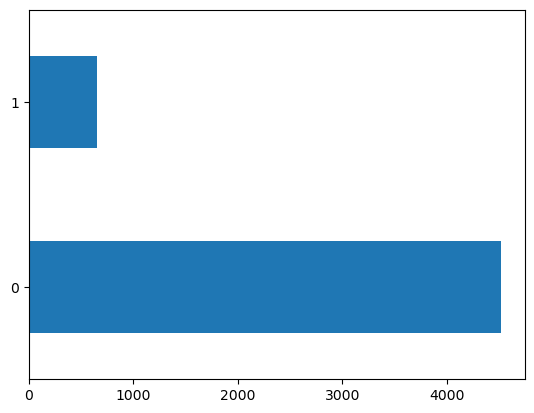

In [67]:
# Check counts of ham and spam
data['target'].value_counts().plot(kind='barh')

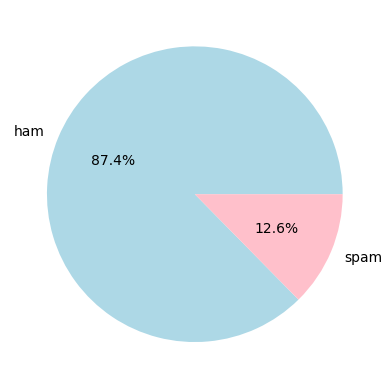

In [68]:
# Create a pie chart with custom colors
colors = ['lightblue', 'pink']
plt.pie(data["target"].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', colors=colors)
plt.show()


# Text Feature Engineering

Now,lets add three new columns

1.num_characters : which counts how many characters are there in each text row

2.num_words : which counts how many words are there in each text row

3.num_sentences: which counts how many sentence are there in each text row

In [73]:
 import nltk
 nltk.download('punkt')
def count_features(text):
    num_characters = len(text)
    num_words = len(nltk.word_tokenize(text))
    num_sentences = len(nltk.sent_tokenize(text))
    return num_characters, num_words, num_sentences

data[['num_characters', 'num_words', 'num_sentences']] = data['text'].apply(lambda x: pd.Series(count_features(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91742\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [75]:
data.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


Lets understand the range and variability of character counts, word counts, and sentence counts in the text data.

In [74]:
#overall(ham and spam)
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


num_characters: Mean: 79, Std: 58, Min: 2, Max: 910, 25th percentile: 36, 75th percentile: 117.

num_words: Mean: 18, Std: 13, Min: 1, Max: 219, 25th percentile: 9, 75th percentile: 26.

num_sentences: Mean: 2, Std: 1.4, Min: 1, Max: 38, 25th percentile: 1, 75th percentile: 2.


In [76]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [77]:
# spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Spam messages have higher average counts for characters, words, and sentences than ham messages.
They also have lower standard deviations, indicating less variability. 
This suggests that spam messages are typically longer and contain more words and sentences than ham messages.

# Visualization :

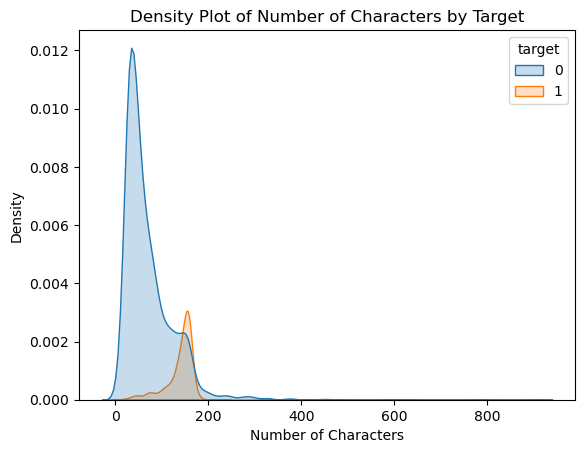

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=data, x='num_characters', hue='target', fill=True)

plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.title('Density Plot of Number of Characters by Target')

plt.show()


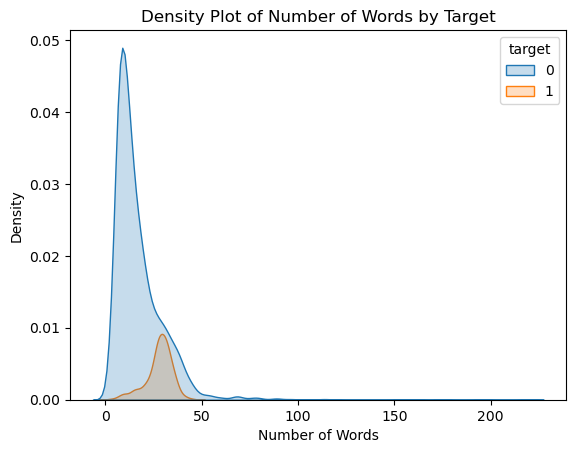

In [85]:
sns.kdeplot(data=data, x='num_words', hue='target', fill=True)

plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Density Plot of Number of Words by Target')

plt.show()

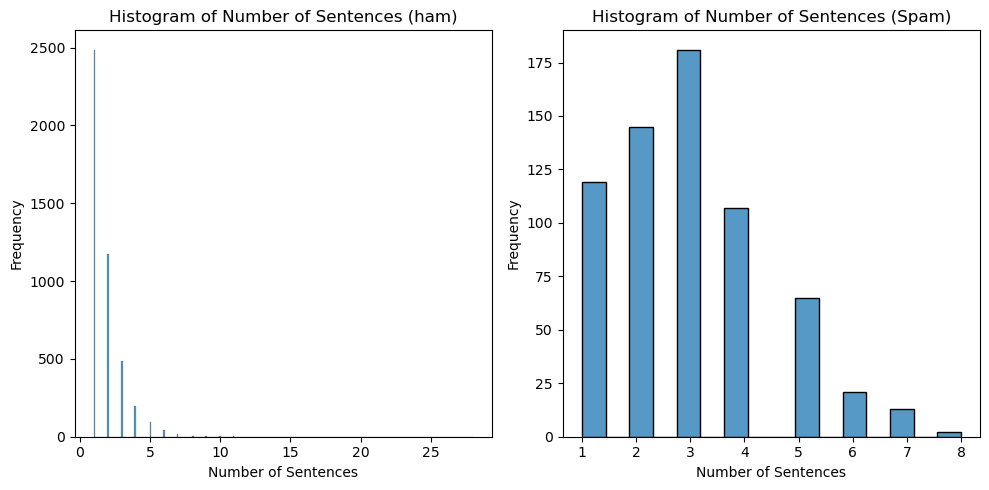

In [87]:
# for num_sentences

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(data[data['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(data[data['target'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()

In [88]:
#finding correlation
data.corr()

C:\Users\91742\AppData\Local\Temp\ipykernel_15432\1730628687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


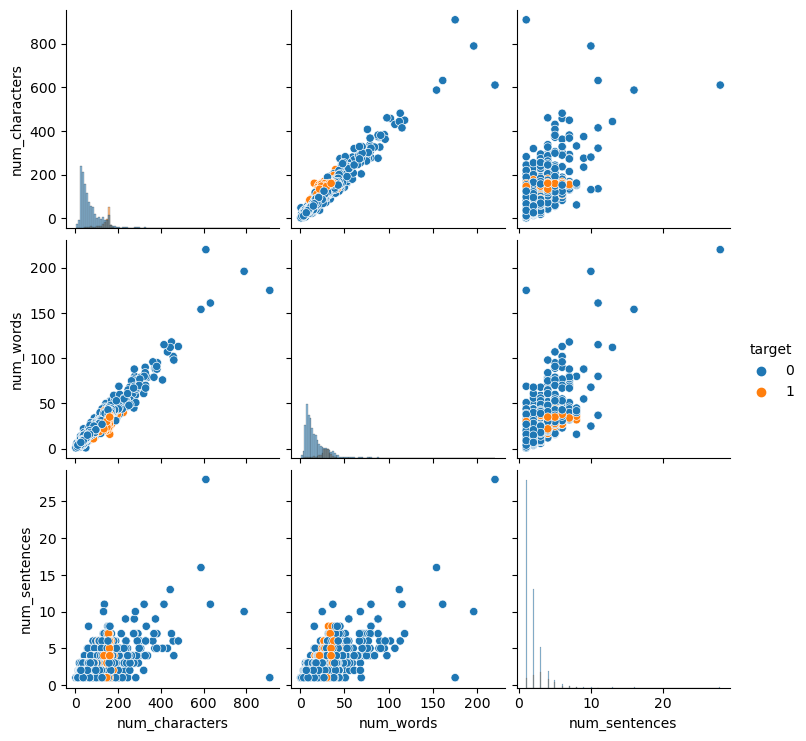

In [91]:
sns.pairplot(data=data, vars=['num_characters', 'num_words', 'num_sentences'], hue='target')

plt.show()


# OBSERVATION

1. Correlation between 'target' and other variables:
- target' has a positive correlation of 0.38 with 'num_characters.
- target' has a positive correlation of 0.26 with 'num_words.
- target' has a positive correlation of 0.27 with 'num_sentences.

2. Correlation between the numerical variables:
- num_characters' and 'num_words' have a strong positive correlation of 0.97.
- num_characters' and 'num_sentences' have a moderate positive correlation of 0.63.
- num_words' and 'num_sentences' have a moderate positive correlation of 0.68.

Overall, the length of the message is somewhat correlated with the likelihood of it being classified as spam. There are also correlations between the different length measures themselves.

# Conclusion :

The Naive Bayes (NB) algorithm has the highest accuracy and precision scores for detecting spam messages.

- Accuracy: NB achieved an accuracy of 0.97, correctly classifying approximately 97.29% of the messages.
- Precision: NB obtained a precision score of 1.000, correctly predicting spam messages 100% of the time.

Based on these results, NB is a strong choice for spam detection. It offers high overall accuracy and an impressive precision score.

The final model for prediction will be an Naive Bayes model.